In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('heart.csv', sep=',')
print(df.head(5), "\n")
print(df.info(), "\n")

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  

In [4]:
# отбор числовых колонок (Числовые признаки)
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)
print(df_numeric)

['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'target']
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0   

In [5]:
# Методы фильтрации

# Сбор информации
list_cols = df.columns.values.tolist()
# print(list_cols[6])

X=df_numeric.iloc[:,:13]
y=df_numeric.iloc[:,13]
print(X)
print(y)

df_numeric_del= df_numeric.dropna()

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

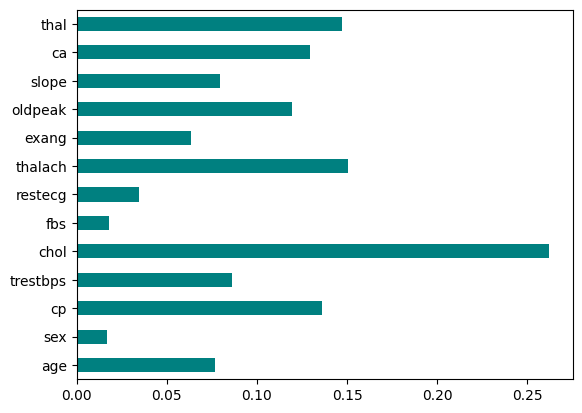

chol        0.262131
thalach     0.150346
thal        0.147226
cp          0.135889
ca          0.129399
oldpeak     0.119595
trestbps    0.086361
slope       0.079463
age         0.076753
exang       0.063211
restecg     0.034643
fbs         0.018134
sex         0.016895
dtype: float64

In [6]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(X, y)
feature_importances = pd.Series(importances,X.columns)
feature_importances.plot(kind='barh', color='teal')
plt.show()
feature_importances.sort_values(ascending=False)

       Specs       Score
7    thalach  650.008493
9    oldpeak  253.653461
2         cp  217.823922
11        ca  210.625919
8      exang  130.470927
4       chol  110.723364
0        age   81.425368
3   trestbps   45.974069
10     slope   33.673948
1        sex   24.373650
12      thal   19.373465


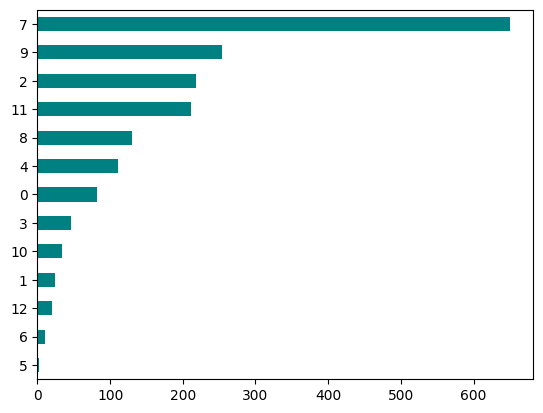

In [7]:
# Критерий хи-квадрат

# примените класс SelectKBest, чтобы извлечь лучшие показатели
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#объединим два фрейма данных для лучшей визуализации

#features = features.sort_values(ascending=True)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #название показателей
print(featureScores.nlargest(11,'Score'))
feature_importances = pd.Series(featureScores['Score'])
feature_importances = feature_importances.sort_values(ascending=True)
feature_importances.plot(kind='barh', color='teal')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# разбиваем набор данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df_numeric_del.drop('target',axis=1), df_numeric_del['target'], test_size=0.3, random_state=42)

# создаем список признаков
col_list = X_train.select_dtypes(include=['number']).columns
print(col_list)
print(X_train.shape, y_train.shape, "\n")

# вычисляем AUC для модели с одним признаком,
# используя перекрестную проверку
log = LogisticRegression(solver='liblinear')
auc=cross_val_score(log, X_train, y_train, cv=13, scoring='roc_auc', error_score='raise')

# превращаем список со значениями AUC в серию
auc_values = pd.Series(auc)
print(auc_values, "\n")

# сортируем по убыванию
auc_values = auc_values.sort_values(ascending=False)
print(auc_values)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
(717, 13) (717,) 

0     0.933589
1     0.922095
2     0.936340
3     0.920424
4     0.948276
5     0.949602
6     0.887268
7     0.960212
8     0.928382
9     0.973475
10    0.875332
11    0.908488
12    0.824934
dtype: float64 

9     0.973475
7     0.960212
5     0.949602
4     0.948276
2     0.936340
0     0.933589
8     0.928382
1     0.922095
3     0.920424
11    0.908488
6     0.887268
10    0.875332
12    0.824934
dtype: float64


In [9]:
# формитруем датасет только из информативных показателей
x_1=X.iloc[:,auc_values.index]#3
x_1

,oldpeak,thalach,fbs,chol,cp,age,exang,sex,trestbps,ca,restecg,slope,thal
0,1.0,168,0,212,0,52,0,1,125,2,1,2,3
1,3.1,155,1,203,0,53,1,1,140,0,0,0,3
2,2.6,125,0,174,0,70,1,1,145,0,1,0,3
3,0.0,161,0,203,0,61,0,1,148,1,1,2,3
4,1.9,106,1,294,0,62,0,0,138,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.0,164,0,221,1,59,1,1,140,0,1,2,2
1021,2.8,141,0,258,0,60,1,1,125,1,0,1,3
1022,1.0,118,0,275,0,47,1,1,110,1,0,1,2
1023,0.0,159,0,254,0,50,0,0,110,0,0,2,2


In [10]:
# Методы обертки

# Рекурсивное исключение признаков

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

threshold = 5

lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=42, n_jobs=-1, max_iter=50)
rfe = RFE(lr, n_features_to_select=5)
rfe=rfe.fit(X, y)
# X_train, y_train - входные и выходные данные с обучающей выборки соответственно.
selector_ind = rfe.get_support()
df_rfe = X.iloc[:, selector_ind]
print(df_rfe.columns)

/home/ilia/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ilia/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

Index(['sex', 'exang', 'slope', 'ca', 'thal'], dtype='object')


/home/ilia/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
# Встроенные методы

# Регуляризация LASSO

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Устанавливаем наш параметр регуляризации C=1
logistic = LogisticRegression(C=1, penalty="l1", solver='liblinear', random_state=7).fit(X, y)

# Где X, y - входные и выходные данные соответственно.
model = SelectFromModel(logistic, prefit=True)
X_new = model.transform(X)

# выводим финальную оценку прогнозирования.
selector_ind = model.get_support()
df_rfe1 = X.iloc[:, selector_ind]
print(df_rfe1.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


/home/ilia/.local/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [12]:
# Регуляризация Тихонова

from sklearn.linear_model import Ridge

n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
clf = Ridge(alpha=1.0)
clf.fit(X, y)
clf.coef_

array([ 0.51088991,  0.03729032, -0.65075201,  0.0930311 ,  0.93380887])

In [13]:
# Комбинирование нескольких методов для отбора признаков

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier, Pool
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import (train_test_split, cross_val_score, cross_validate)

# разбиваем набор данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df_numeric_del.drop('target', axis=1), df['target'], test_size=0.3, random_state=42)

# Сначала ищем оптимальный темп обучения для зафиксированного количества деревьев
# создаем экземляр класса LGBMClassifier
lgbm_model = LGBMClassifier(random_state=42,n_estimators=300)
# задаем сетку гиперпараметров
param_grid = { 'learning_rate': [0.01, 0.05, 0.1] }
# создаем экземпляр класса GridSearchCV, передав
# конвейер, сетку гиперпараметров и указав
# количество блоков перекрестной проверки
gs = GridSearchCV(lgbm_model,param_grid, scoring='roc_auc', cv=5)
# выполняем поиск по всем значениям сетки
gs.fit(X_train, y_train);
# смотрим наилучшие значения гиперпараметров
print("Наилучшие значения гиперпараметров: {}".format( gs.best_params_))
# смотрим наилучшее значение AUC
print("Наилучшее значение AUC: {:.3f}".format(gs.best_score_))

# Теперь ищем с помощью обычного поиска по сетке оптимальные значения гиперпараметров
# Гиперпараметр lambda_l1 - задает штрафной коэффициент перед L1-нормой вектора весов листьев (по умолчанию 0).
# Гиперпараметр bagging_ fraction - задает случайный отбор наблюдений без возвращения.
# Он может принимать значения от 0 до 1
# Гиперпараметр feature_fraction - задает случайный отбор признаков для каждого дерева.
# Он может принимать значения от 0 до 1
# создаем экземляр класса LGBMClassifier
lgbm_model2 = LGBMClassifier(random_state=42, n_estimators=300, learning_rate=0.01)

# задаем сетку гиперпараметров
param_grid2 = {
 'lambda_l1': [0, 10],
 'bagging_fraction': [0.5, 1],
 'feature_fraction': [0.5, 1]
}

# создаем экземпляр класса GridSearchCV, передав
# конвейер, сетку гиперпараметров и указав
# количество блоков перекрестной проверки
gs2 = GridSearchCV(lgbm_model2, param_grid2, scoring='roc_auc', cv=5)
# выполняем поиск по всем значениям сетки
gs2.fit(X_train, y_train)
# смотрим наилучшие значения гиперпараметров
print('Наилучшие значения гиперпараметров: {}'.format(gs2.best_params_))
# смотрим наилучшее значение AUC
print('Наилучшее значение AUC: {:.3f}'.format(gs2.best_score_))

# Теперь вычислим важности признаков на основе информационного выигрыша.
# создаем экземляр класса LGBMClassifier
model_all_features = LGBMClassifier(
 random_state=42, learning_rate=0.01,
 n_estimators=300, bagging_fraction=0.5,
 feature_fraction=1, lambda_l1=10,
 importance_type='gain')

# выполняем перекрестную проверку и сохраняем результат
# с помощью функции cross_validate()
output = cross_validate(
 model_all_features, X_train, y_train, cv=5,
 scoring='roc_auc', return_estimator=True)

# создаем список fi, в который будем сохранять
# важности признаков, и сохраняем в него важности,
# рассчитанные для каждой из моделей
fi = []
for estimator in output['estimator']:
 fi.append(estimator.feature_importances_)

# преобразовываем список в датафрейм, индексы в котором
# будут именами наших переменных
fi = pd.DataFrame(
 np.array(fi).T,
 columns=['importance ' + str(idx)
 for idx in range(len(fi))],
 index=X_train.columns)

# вычисляем усредненные важности и добавляем столбец с ними
fi['mean_importance'] = fi.mean(axis=1)

# смотрим полученный датафрейм
fi

[LightGBM] [Info] Number of positive: 301, number of negative: 272
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 573, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.525305 -> initscore=0.101308
[LightGBM] [Info] Start training from score 0.101308
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

,importance 0,importance 1,importance 2,importance 3,importance 4,mean_importance
age,90.357366,96.785868,14.033518,206.503980,109.565840,103.449315
sex,141.833057,224.051329,88.631408,34.299442,72.263116,112.215670
cp,4195.797767,4233.488791,5082.932394,5873.078971,4528.119041,4782.683393
trestbps,154.352045,8.162152,168.913747,46.000073,244.571209,124.399845
chol,233.116434,177.422319,111.077719,127.234249,297.537549,189.277654
fbs,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
restecg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
thalach,713.275004,625.984950,360.402729,255.303293,950.228515,581.038898
exang,148.433377,222.733356,90.805318,200.119623,382.023556,208.823046
oldpeak,3357.762373,1338.887681,2018.955572,1061.848083,1908.992357,1937.289213


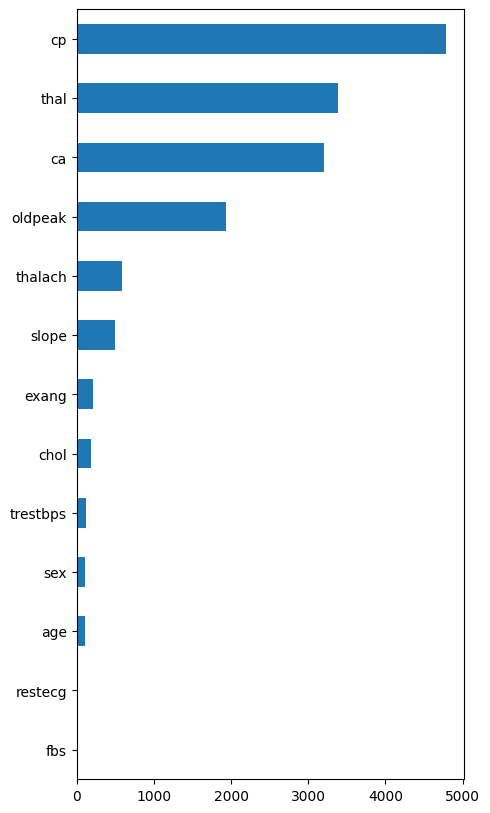

In [14]:
# записываем серию, в которой индексные метки - признаки,
# значения - важности
features = fi['mean_importance']
# сортируем индексные метки по возрастанию важностей
features = features.sort_values(ascending=True)
features

# выводим график усредненных важностей
features.plot.barh(figsize=(5, 10));

In [15]:
# создаем список признаков
features = list(features.index)
features

# вычисляем оценку AUC-ROC, усредненную по 5 проверочным
# блокам перекрестной проверки (5 моделям со всеми
# признаками)
auc_score_all = output['test_score'].mean()
auc_score_all

# задаем пороговое значение разницы AUC
tol = 0.0001
print("выполнение последовательного удаления признаков")

# создаем список, в который будем
# записывать удаляемые признаки
features_to_remove = []
# создаем список, в который будем
# записывать значение AUC
auc_score_mean_list = []
# создаем список, в который будем
# записывать разницу AUC
diff_auc_list = []
# задаем счетчик для оценки прогресса
count = 1

# итерируем по всем признакам, признаки упорядочены по
# возрастанию важности на основе информационного выигрыша
for feature in features:
    print()
    print("проверяемый признак: ", feature, " признак ", count, " из ", len(features))
    count = count + 1
    # создаем экземляр класса LGBMClassifier
    model = LGBMClassifier(
        random_state=42, learning_rate=0.01,
        n_estimators=300, bagging_fraction=0.5, 
        feature_fraction=1, lambda_l1=10)

    # обучаем модели со всеми признаками минус уже удаленные признаки
    # (берем их из списка удаляемых признаков) и оцениваемый признак
    auc_scores = cross_val_score(
        model,
        X_train.drop(features_to_remove + [feature], axis=1),
        y_train,
        scoring='roc_auc',
        cv=5)
    
    # вычисляем AUC, усредненный по проверочным блокам
    # перекрестной проверки
    auc_score_mean = auc_scores.mean()
    # печатаем усредненное значение AUC
    print("AUC модели после удаления={}".format((auc_score_mean)))
    # добавляем усредненное значение AUC в список
    auc_score_mean_list.append(auc_score_mean)
    # печатаем AUC модели со всеми признаками
    # (опорное значение AUC)
    print("AUC модели со всеми признаками={}".format((auc_score_all)))
    # определяем разницу AUC (если отрицательное значение
    # - удаление признака улучшило AUC)
    diff_auc = auc_score_all - auc_score_mean
    # записываем разницу AUC в список
    diff_auc_list.append(diff_auc)

    # сравниваем разницу AUC с порогом, заданным заранее
    # если разница AUC больше или равна порогу, сохраняем
    if diff_auc >= tol:
        print("Разница AUC={}".format(diff_auc))
        print("сохраняем: ", feature)
        print
    # если разница AUC меньше порога, удаляем
    else:
        print("Разница AUC={}".format(diff_auc))
        print("удаляем: ", feature)
        print
        # если разница AUC меньше порога и мы удаляем признак,
        # мы в качестве нового опорного значения AUC задаем
        # значение AUC для модели с оставшимися признаками
        auc_score_all = auc_score_mean
        # добавляем удаляемый признак в список
        features_to_remove.append(feature)
        
# формируем датафрейм
df = pd.DataFrame({'feature': features, 'auc_score_mean': auc_score_mean_list, 'diff_auc_score': diff_auc_list})
# цикл завершен, вычисляем количество
# удаленных признаков
print("ВЫПОЛНЕНО!!")
print("общее количество признаков для удаления: ", len(features_to_remove))
# определяем признаки, которые мы хотим сохранить (не удаляем)
features_to_keep = [x for x in features if x not in features_to_remove]
print("общее количество признаков для сохранения: ", len(features_to_keep))


выполнение последовательного удаления признаков

проверяемый признак:  fbs  признак  1  из  13
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Info] Number of positive: 301, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.


In [16]:
df = pd.read_csv('heart.csv', sep=',')
dgg_new= []
features_to_keep
for col in features_to_keep:
    dgg_new.append(df.loc[:, col])
    
dff1 = pd.DataFrame(dgg_new).T

In [17]:
dff1

,age,sex,chol,exang,slope,oldpeak,ca,thal,cp
0,52.0,1.0,212.0,0.0,2.0,1.0,2.0,3.0,0.0
1,53.0,1.0,203.0,1.0,0.0,3.1,0.0,3.0,0.0
2,70.0,1.0,174.0,1.0,0.0,2.6,0.0,3.0,0.0
3,61.0,1.0,203.0,0.0,2.0,0.0,1.0,3.0,0.0
4,62.0,0.0,294.0,0.0,1.0,1.9,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...
1020,59.0,1.0,221.0,1.0,2.0,0.0,0.0,2.0,1.0
1021,60.0,1.0,258.0,1.0,1.0,2.8,1.0,3.0,0.0
1022,47.0,1.0,275.0,1.0,1.0,1.0,1.0,2.0,0.0
1023,50.0,0.0,254.0,0.0,2.0,0.0,0.0,2.0,0.0
